In [ ]:
# import csv
# import numpy as np
# l = []
# with open('lng2.csv', newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     l = [row[0] for row in reader]

In [ ]:
# all = []
# def split( x ) ->list:
#     x = str(x)
#     x = x.split(" ")

#     if len(x[1]) < 5:
#         all.append(x)
#         return [0,0,0,0,0,0,0]
#     return [ int(x[0]), int(x[1]), int(x[2]), int(x[3]), float(x[4]), float(x[5]), int(x[6]) ]


# data = [split(row) for row in l]

In [ ]:
# filename = 'output.csv'  # 输出文件名

# with open(filename, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(data)

# print("CSV文件已成功生成。")


In [1]:
import pandas as pd
import csv
data = pd.read_csv("output.csv")

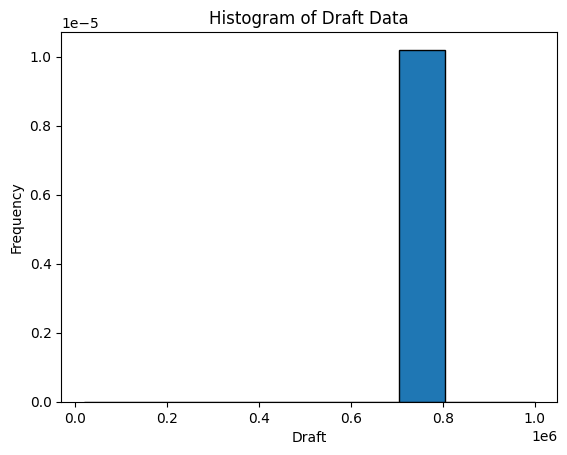

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 提取 "吃水"（draft）列数据
draft_data = data['draft']

# 绘制直方图
plt.hist(draft_data, bins=10, edgecolor='black',density=True, range=(20000,1000000))

# 设置坐标轴标签和标题
plt.xlabel('Draft')
plt.ylabel('Frequency')
plt.title('Histogram of Draft Data')

# 显示图形
plt.show()

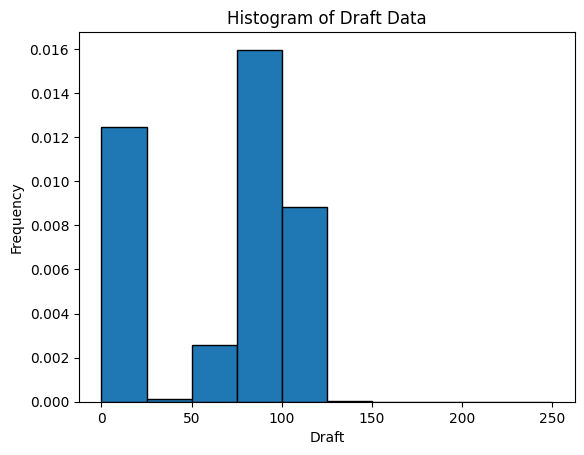

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 提取 "吃水"（draft）列数据
draft_data = data['draft']

# 绘制直方图
plt.hist(draft_data, bins=10, edgecolor='black',density=True, range=(0,250))

# 设置坐标轴标签和标题
plt.xlabel('Draft')
plt.ylabel('Frequency')
plt.title('Histogram of Draft Data')

# 显示图形
plt.show()

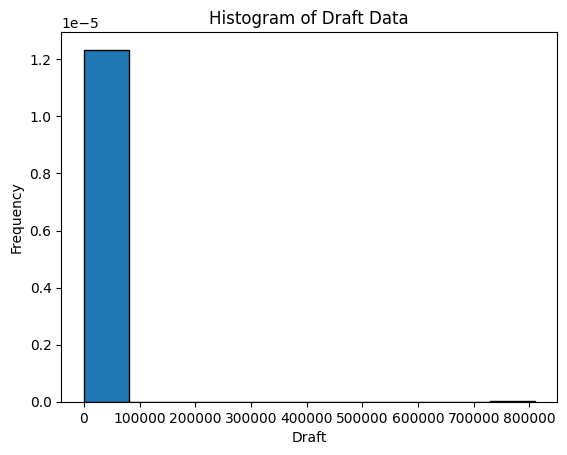

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# 提取 "吃水"（draft）列数据
draft_data = data['draft']

# 绘制直方图
plt.hist(draft_data, bins=10, edgecolor='black',density=True)

# 设置坐标轴标签和标题
plt.xlabel('Draft')
plt.ylabel('Frequency')
plt.title('Histogram of Draft Data')

# 显示图形
plt.show()

In [5]:
# 分析draft
data['draft'].mean(),data['draft'].max(), data['draft'].min(),data['draft'].median(),data['draft'].mode()

(968.0933186727634,
 809728,
 0,
 93.0,
 0    0
 dtype: int64)

In [6]:
draft_data = data[data['draft'] > data['draft'].median()]
draft_data2 = data[data['draft'] > data['draft'].mean()]
# 计算满足条件的行数
len(data), len(draft_data),len(draft_data2)


(7896919, 3571392, 9195)

In [10]:
draft_data.shape, draft_data2.shape

((3571392, 7), (9195, 7))

In [9]:
# 删除噪声数据
# 计算每个 'mmsi' 的出现次数
mmsi_counts = draft_data2['mmsi'].value_counts()

# 筛选出出现次数大于等于 5 次的 'mmsi'
valid_mmsi = mmsi_counts[mmsi_counts >= 5].index

# 使用筛选后的 'mmsi' 进行条件过滤，删除不符合条件的数据
filtered_data = draft_data2[draft_data2['mmsi'].isin(valid_mmsi)]

# 重置索引
filtered_data = filtered_data.reset_index(drop=True)

In [11]:
filtered_data.shape

(9172, 7)

In [12]:
import pandas as pd
filtered_data.to_csv("filtered_data.csv",index=False)

In [ ]:
import pandas as pd
# 初始化存储结果的列表
averaged_data = []

# 记录当前 mmsi 的计数
mmsi_count = 0
j = 0
# 遍历每一行数据
for index, row in filtered_data.iterrows():
    # j +=1
    # if j > 1000:
    #    break
    # 如果遇到新的 mmsi
    if row['mmsi'] != mmsi_count:
        # 更新当前 mmsi 的计数，并重置 count 变量和 sum_values 变量
        mmsi_count = row['mmsi']
        count = 0
        sum_values = {col: 0 for col in filtered_data.columns if col != 'mmsi'}

    # 如果当前计数是 10 的倍数，将累加值除以计数得到平均值
    if count % 10 == 0 and count != 0:
        averaged_values = {col: sum_values[col] / count for col in sum_values}
        averaged_values['mmsi'] = mmsi_count
        averaged_data.append(averaged_values)
        count = 0
        sum_values = {col: 0 for col in filtered_data.columns if col != 'mmsi'}

    # 累加当前行的值
    for col in sum_values:
        sum_values[col] += row[col]

    count += 1

# 将结果转换为 DataFrame
averaged_data = pd.DataFrame(averaged_data)


In [ ]:
# 每隔50行读数据
import pandas as pd
# 每隔十行读取数据
sampled_data = filtered_data.iloc[::100]

# 合并采样后的数据为新的 DataFrame
selected_data = pd.concat([sampled_data])

# 重置索引
selected_data = selected_data.reset_index(drop=True)



In [ ]:
filtered_data[10:20]

In [ ]:
sampled_data.shape

In [ ]:
import matplotlib.pyplot as plt
# 提取 "longitude" 和 "latitude" 字段的数据
longitude = sampled_data['longtitude']
latitude = sampled_data['latitude']

# 绘制二维坐标轴
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Coordinate Axes')

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# 提取 "longitude" 和 "latitude" 字段的数据
longitude = draft_data2['longtitude']
latitude = draft_data2['latitude']

# 绘制二维坐标轴
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Coordinate Axes')

# 显示图形
plt.show()

In [ ]:
#speed_data.to_csv('speed_data.csv', index=True)

In [13]:
import plotly.express as px
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longtitude', zoom=0)

# 设置地图样式
fig.update_layout(mapbox_style='open-street-map')


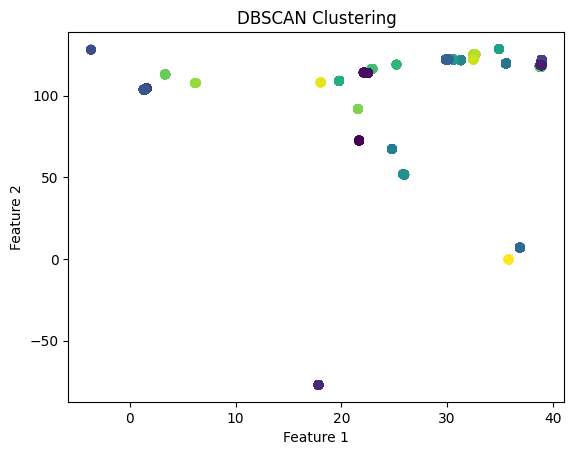

27


In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

features = ['latitude', 'longtitude']
X = filtered_data[features].values

# 创建 DBSCAN 对象并设置参数
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 拟合数据
dbscan.fit(X)

# 获取聚类结果
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()
print(n_clusters)

In [27]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN

filtered_data = pd.read_csv('filtered_data.csv')

# 选择需要聚类的特征列
features = ['latitude', 'longitude']
X = filtered_data[features].values

# 创建 DBSCAN 对象并设置参数
dbscan = DBSCAN(eps=0.3, min_samples=5)

# 拟合数据
dbscan.fit(X)

# 获取聚类结果标签
labels = dbscan.labels_

# 将聚类结果添加到数据集中
filtered_data['cluster_label'] = labels

# 使用 Plotly Express 创建地图图形对象
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude', color='cluster_label', zoom=0)

# 设置地图样式为 'open-street-map'
fig.update_layout(mapbox_style='open-street-map')

# 显示地图
fig.show()


In [35]:
test_data = filtered_data[(filtered_data['longitude'] >= 125) & (filtered_data['longitude'] <= 126) & (filtered_data['latitude'] >= 32) & (filtered_data['latitude'] <= 33)]
#test_data.shape
test_data[:]


,mmsi,time,status,speed,longitude,latitude,draft,cluster_label
8441,538008876,1637076096,15,6,125.276299,32.696171,763905,24
8442,538008876,1637077307,15,5,125.271942,32.695229,763905,24
8443,538008876,1637078247,15,6,125.269043,32.694008,763905,24
8444,538008876,1637078337,15,6,125.268707,32.693848,763905,24
8445,538008876,1637079237,15,6,125.266167,32.692181,763905,24
...,...,...,...,...,...,...,...,...
8514,538008876,1637305051,15,6,125.223679,32.506512,763905,24
8515,538008876,1637305342,15,5,125.223694,32.505566,763905,24
8516,538008876,1637305349,15,5,125.223694,32.505535,763905,24
8517,538008876,1637306750,15,7,125.223610,32.501057,763905,24


In [39]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN


# 选择需要聚类的特征列
features = ['latitude', 'longitude']
X = filtered_data2[features].values

# 创建 DBSCAN 对象并设置参数
dbscan = DBSCAN(eps=0.3, min_samples=15)

# 拟合数据
dbscan.fit(X)

# 获取聚类结果标签
labels = dbscan.labels_

# 将聚类结果添加到数据集中
filtered_data2['cluster_label'] = labels

# 使用 Plotly Express 创建地图图形对象
fig = px.scatter_mapbox(filtered_data2, lat='latitude', lon='longitude', color='cluster_label', zoom=0)

# 设置地图样式为 'open-street-map'
fig.update_layout(mapbox_style='open-street-map')

# 显示地图
fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16640\1195257616.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
filtered_data2 = filtered_data[filtered_data['speed']<3]
test_data2 = test_data[test_data['speed']<3]

In [37]:
filtered_data.shape, filtered_data2.shape,test_data.shape,test_data2.shape

((9172, 8), (8556, 8), (78, 8), (8, 8))

In [ ]:
import math

def distance(lat1, lon1, lat2, lon2):
    R = 6371.393  # Radius of the Earth in kilometers
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

